## Project Name: Predicting US personal medical insurance charges using machine learning.

### OUTCOMES

- 1. load the dataset

- 2. Y data Profiling (Automatic EDA)
    - Basic Understanding the dataset
    - drop the column
    - Rename or Simply columns
    - Correlation Numberical features VS Target Variable

- 2.5: Data Preprocessing:
    
    - 1.  handling missing values
    
    - 2.  outlier detection (IQR Method) and handle (log transform)
    
    - 3.  encoding Categorical Features
    
    - 4. Features engineering with Binning Transformation
    
    - 4.1. Domain-driven risk Transformation
    
    - 5. scaling Numerical Features

- 3. Train Test Split
    - Seperate Features Matrix (X) and Target Variable (y)
    - Train Test Split

- 4. Create Pipeline For Our model

    - 1. Pipeline for Numerical Features
    - 2. Pipeline for Categorical Features
    - 3. Combine them (numerical and catagorical Features)
    - 4. Define Model
        - Base learner
        - Fit the base learner with Our model

- 5. Model Training and Evaluation
    - Prediction and visualization


- 6. Cross Validation

- 7. Grid Search CV on Our model
    - To Get the best Parameter

- 8. Randomized Search CV
    - To Get the best Parameter

- 9. Comapre Which Parameters is Best for Our model.
    - 9.1: Prediction and Evaluation for Grid search:
    - 9.2: Prediction and Evaluation for Random Search cv:

- 10. Save Model with Best Parameters

- 11. MLFlow Introduce
    - 11.1: Discover MLFlow

    - 11.2: Mlflow with RandomForest model

    - 11.3: Mlflow with our best model

In [ ]:
### === import necessary libraries === ###

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
from ydata_profiling import ProfileReport


## Sklearn Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor

#### Evaluation Metrices
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### 1. load the dataset

In [3]:
# load the dataset
df = pd.read_csv("insurance.csv")

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [107]:

print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
age : 47
sex : 2
bmi : 548
children : 6
smoker : 2
region : 4
charges : 1337


In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [109]:
# Shape
df.shape

(1338, 7)

### 2. Y data Profiling (Automatic EDA)

In [9]:
# y-data profiling

profile = ProfileReport(df, title="Health Insurance Cost Analysis", explorative = True)

# convert csv file to html
profile.to_file("ydata_insurance.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 7/7 [00:00<00:00, 50.05it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [110]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


#### 2.1: Basic Understanding the dataset

- 1. Dataset statistics:
    - Total Features : 7
    - Total Sample   : 1338

    - Numerical Features:
        - [age, bmi, children, charges]

    - Categorical Features:
        - [sex, smoker, region]

- 2. Columns & Their Meaning:

    - 1. age:
        - Age of primary beneficiary.
    
    - 2. sex:
        - Gender either male or female.
    
    - 3. bmi:
        - a quick measure of body fat based on height and weight.

        - Body Mass Index (weight(kg)/height²(m^2)).

    - 4. children:
        - Number of children or dependents covered by health insurance.

    - 5. smoker:
        - smoker Status either Yes or NO.

    - 6. region:
        - The beneficiary's residentia area in US.

    - 7. charges:
        - Individual medical costs billed by health insurance.


- ydata Profiling (Automatical EDA) we get some decision:
- ydata Profiling (Automatical EDA) we get some decision:

- 1. Numerical Features
    - [age, bmi, children]

- 2. Categorical Features
    - [sex, smoker, region]

- 3. Target Features
    - [ charges ]


- NOTE:

    - "age" is highly overall correlated with "charges".
    
    - "smoker" is highly overall correlated with "charges".

    - There is one Duplicate row
        - So, We Keeps the first occurrence.


#### 2.2:  Keeps the first occurrence

In [111]:
df.shape

(1338, 7)

In [112]:
# keeps the first occurance
df = df.drop_duplicates()

df.shape

(1337, 7)

In [13]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


#### 2.3: Rename or Simply columns

In [113]:
# Rename So we easily understand our features or columns

df.columns = [
   'person_age', 'person_gender', 'person_bmi', 'num_children', 'is_smoker',
   'region', 'medical_cost'
]

df.head(2)

,person_age,person_gender,person_bmi,num_children,is_smoker,region,medical_cost
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [114]:
#    - Show number of unique values per column.

print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values per column:
person_age : 47
person_gender : 2
person_bmi : 548
num_children : 6
is_smoker : 2
region : 4
medical_cost : 1337


In [115]:
#    - Show missing value summary for each column.

df.isnull().sum()

,0
person_age,0
person_gender,0
person_bmi,0
num_children,0
is_smoker,0
region,0
medical_cost,0


#### 2.4: Correlation Numberical features VS Target Variable

In [116]:
# Numerical vs Target Correlation

corr_target = df.select_dtypes(include= np.number).corr()['medical_cost'].sort_values(ascending=False)

print("Correlation Between Numerical Features and Target Variable: \n", corr_target)

Correlation Between Numerical Features and Target Variable: 
 medical_cost    1.000000
person_age      0.298308
person_bmi      0.198401
num_children    0.067389
Name: medical_cost, dtype: float64


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
person_bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
num_children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
medical_cost,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


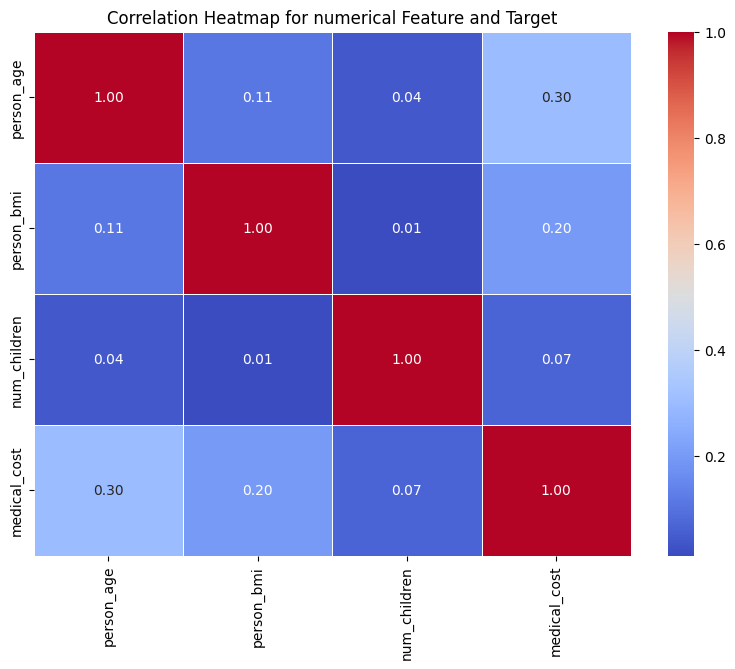

In [117]:
# Bivariate Analysis Numerical columns with Target

numeric_cols = ['person_age', 'person_bmi', 'num_children']

target_col = "medical_cost"

corr_matrix = df[numeric_cols + [target_col]].corr()


plt.figure(figsize = (8,6))

sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)

plt.title("Correlation Heatmap for numerical Feature and Target")

plt.tight_layout()
plt.xticks(rotation = 90) # 90 default

plt.show()

### 2.5: Data Preprocessing:
    
    - 1.  handling missing values
    
    - 2.  outlier detection (IQR Method) and handle (log transform)
    
    - 3.  encoding Categorical Features
    
    - 4. Features engineering with Binning Transformation
    
    - 4.1. Domain-driven risk Transformation
    
    - 5. scaling Numerical Features

#### 1.  handling missing values

In [118]:
## 1. Handling Missing Values

print("Missing values :")
print(df.isna().sum())

Missing values :
person_age       0
person_gender    0
person_bmi       0
num_children     0
is_smoker        0
region           0
medical_cost     0
dtype: int64


#### 2.  outlier detection

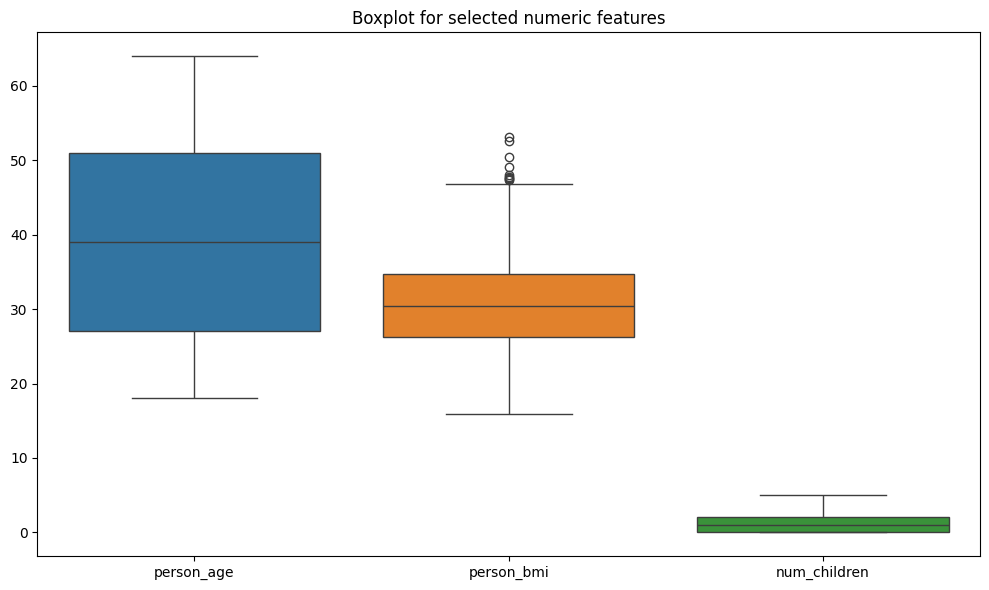

In [119]:
### Outliers detection
plt.figure(figsize=(10,6))

sns.boxplot(data = df[numeric_cols])

plt.title("Boxplot for selected numeric features")


plt.tight_layout()

plt.show()

In [120]:
### Use the IQR Method to detect(identify) outliers

col = 'person_bmi' # <- person_bmi column how many outliers

Q1 = df[col].quantile(0.25)

Q3 = df[col].quantile(0.75)

IQR = Q3 - Q1  # [middle 50 % data]

lower = Q1 - 1.5 * IQR # [- lower range for non-outliers]

upper = Q3 + 1.5 * IQR # [- upper range for non-outliers]


outliers = df[
    (df[col] < lower) |
    (df[col] > upper)
    ]

print(f"Q1(25% ) data: {Q1}")
print(f"Q3(50% ) data: {Q3}")

print(f"IQR(Middle 50%): {IQR}")

print("Lower Range for outlier: ", lower)
print("Upper Range for outliers: ", upper)


print(f"Outlier of {df[col]} are : \n {outliers[col]}")

print(f"Number of detected outliers in {col}: ", len(outliers))


Q1(25% ) data: 26.29
Q3(50% ) data: 34.7
IQR(Middle 50%): 8.410000000000004
Lower Range for outlier:  13.674999999999994
Upper Range for outliers:  47.31500000000001
Outlier of 0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: person_bmi, Length: 1337, dtype: float64 are : 
 116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: person_bmi, dtype: float64
Number of detected outliers in person_bmi:  9


##### Way_1: To Handling outliers by using -> log transform the column of peson_bmi.

- Purpose:
    - Log transform reduces skewness and compresses extreme values in a suitable range.

In [121]:
# outlier heandling using log transform on bmi column

col = "person_bmi"

df_log = df.copy()

df_log[col + '_log'] = np.log(df_log[col] + 1)

print(f"After log transform {col} column data points are: ", df_log)

After log transform person_bmi column data points are:        person_age person_gender  person_bmi  num_children is_smoker     region  \
0             19        female      27.900             0       yes  southwest   
1             18          male      33.770             1        no  southeast   
2             28          male      33.000             3        no  southeast   
3             33          male      22.705             0        no  northwest   
4             32          male      28.880             0        no  northwest   
...          ...           ...         ...           ...       ...        ...   
1333          50          male      30.970             3        no  northwest   
1334          18        female      31.920             0        no  northeast   
1335          18        female      36.850             0        no  southeast   
1336          21        female      25.800             0        no  southwest   
1337          61        female      29.070           

In [122]:
df_log.head()

,person_age,person_gender,person_bmi,num_children,is_smoker,region,medical_cost,person_bmi_log
0,19,female,27.900,0,yes,southwest,16884.92400,3.363842
1,18,male,33.770,1,no,southeast,1725.55230,3.548755
2,28,male,33.000,3,no,southeast,4449.46200,3.526361
3,33,male,22.705,0,no,northwest,21984.47061,3.165686
4,32,male,28.880,0,no,northwest,3866.85520,3.397189


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   person_age     1337 non-null   int64  
 1   person_gender  1337 non-null   object 
 2   person_bmi     1337 non-null   float64
 3   num_children   1337 non-null   int64  
 4   is_smoker      1337 non-null   object 
 5   region         1337 non-null   object 
 6   medical_cost   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


#### 3.  encoding Categorical Features

In [124]:
# OneHot Encoding for  categorical columns

cat_cols = ["person_gender", "is_smoker", "region"]

df_encoded = pd.get_dummies(
    df_log,
    columns = cat_cols,
    dtype=int
)

df_encoded.head()

,person_age,person_bmi,num_children,medical_cost,person_bmi_log,person_gender_female,person_gender_male,is_smoker_no,is_smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.363842,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,3.548755,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,3.526361,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,3.165686,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,3.397189,0,1,1,0,0,1,0,0


#### 4.  Features engineering

-** Binning Transformation**

- Definition:

    - A process to converting continuous(numerical) features to a specific group of categorical features.

In [125]:
df_encoded.head()

,person_age,person_bmi,num_children,medical_cost,person_bmi_log,person_gender_female,person_gender_male,is_smoker_no,is_smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,3.363842,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,3.548755,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,3.526361,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,3.165686,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,3.397189,0,1,1,0,0,1,0,0


In [126]:
# Binning person_age (column) into categories (Young, middle, old)

df_encoded["Age_bins"] = pd.cut(
    df_encoded["person_age"], # Binning is happen based on this column

    bins=[0,25,45,100], # this are the bins or basket range

    labels = ["Young", "Middle", "Old"]

)

print(df_encoded[["person_age", "Age_bins"]].sample(10))

      person_age Age_bins
435           60      Old
1036          22    Young
1220          30   Middle
1081          32   Middle
908           63      Old
747           19    Young
134           20    Young
1094          50      Old
871           26   Middle
1186          20    Young


#### 4.1. Domain-driven risk Transformation on **person_bmi** column

- label the numerical features based of domain

- A process  convert numerical features to categorical features based on Domain.

In [127]:
df_encoded.head(2)

,person_age,person_bmi,num_children,medical_cost,person_bmi_log,person_gender_female,person_gender_male,is_smoker_no,is_smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Age_bins
0,19,27.90,0,16884.9240,3.363842,1,0,0,1,0,0,0,1,Young
1,18,33.77,1,1725.5523,3.548755,0,1,1,0,0,0,1,0,Young


In [128]:
# code Implementation

# Domain-driven risk categories for person_bmi

# for person_bmi
def bmi_risk(bmi):
    if bmi < 18.5:
        return "Underweight"

    elif (bmi >= 18.5) and (bmi < 24.9):
        return "Normal"

    elif (bmi >= 24.9) and (bmi < 29.9):
        return "Overweight"

    else:
        return "Obese"




# for RestingBP
df_encoded["Bmi_risk"] = df_encoded["person_bmi"].apply(bmi_risk)


# display

df_encoded[["person_bmi", "Bmi_risk"]].sample(10)



,person_bmi,Bmi_risk
1249,33.630,Obese
103,29.920,Obese
815,31.460,Obese
1219,30.210,Obese
1307,28.120,Overweight
970,28.160,Overweight
1152,32.560,Obese
105,28.025,Overweight
1153,35.815,Obese
605,34.100,Obese


#### 5.  scaling Numerical Features


In [129]:
df.head(2)

,person_age,person_gender,person_bmi,num_children,is_smoker,region,medical_cost
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [130]:
encoded_df = df_encoded.drop(columns=['Age_bins','Bmi_risk' ])

encoded_df.head(2)

,person_age,person_bmi,num_children,medical_cost,person_bmi_log,person_gender_female,person_gender_male,is_smoker_no,is_smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,3.363842,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,3.548755,0,1,1,0,0,0,1,0


In [131]:
# MinMaxScaler scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_cal = encoded_df.drop('medical_cost', axis = 1)
y_cal = encoded_df['medical_cost']


X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_cal, y_cal, test_size=0.2, random_state=42
)

scaler = MinMaxScaler()

# Fit on training data only
X_train_scaled_mm = scaler.fit_transform(X_train_scaled)

# Transform test data
X_test_scaled_mm = scaler.transform(X_test_scaled)

X_train_scaled_mm[:3]



array([[0.10869565, 0.23002421, 0.        , 0.35174668, 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.06521739, 0.26324993, 0.4       , 0.39248408, 0.        ,
        1.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.73913043, 0.58017218, 0.4       , 0.70696069, 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

###  3. Train Test Split
- 3.1: Seperate Features Matrix (X) and Target Variable (y)
- 3.2: Train Test Split

#### 3.1: Seperate Features Matrix (X) and Target Variable (y)

In [132]:
# Features matrix
X = df.drop('medical_cost', axis = 1)

# Target Variable
y = df['medical_cost']

X.shape, y.shape

((1337, 6), (1337,))

In [133]:
# Numerical Features
numeric_features = X.select_dtypes(include= ['int64', 'float64']).columns

# Categorical Features

categorical_features = X.select_dtypes(include=['object']).columns

numeric_features

Index(['person_age', 'person_bmi', 'num_children'], dtype='object')

In [134]:
categorical_features

Index(['person_gender', 'is_smoker', 'region'], dtype='object')

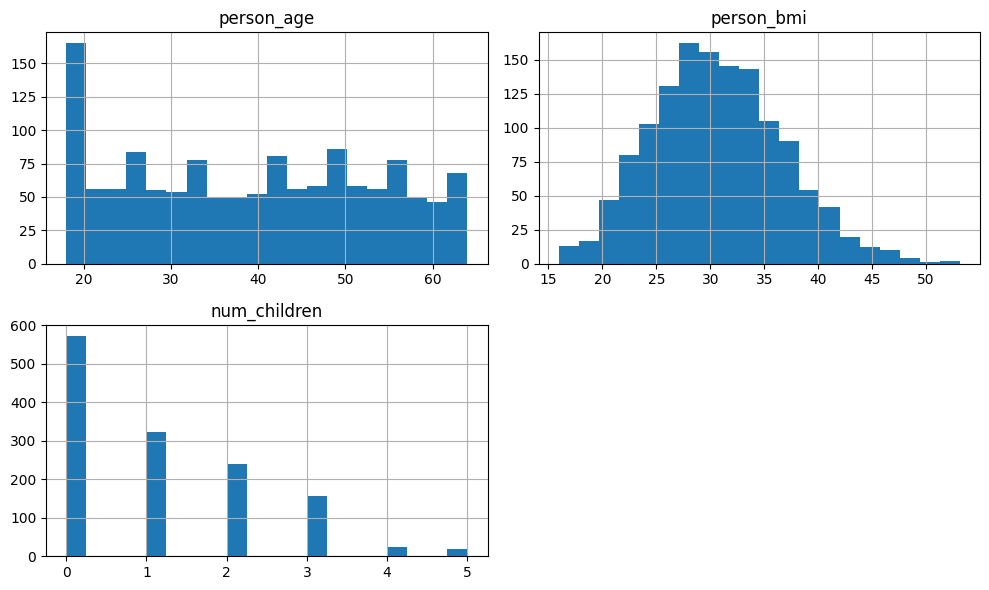

In [135]:
#  Univariate Analysis on numerical column

import matplotlib.pyplot as plt

# # Histograms
df[numeric_features].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

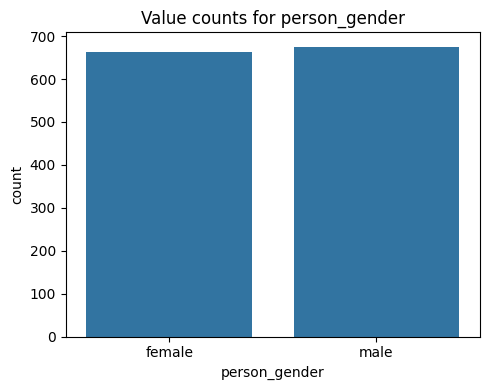

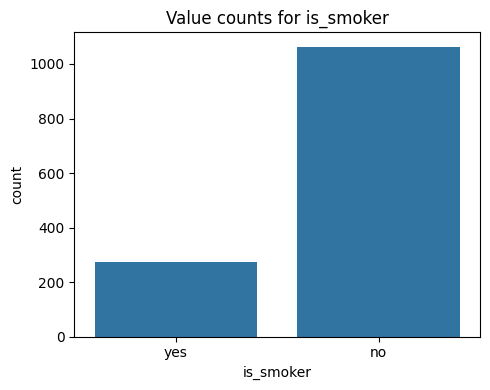

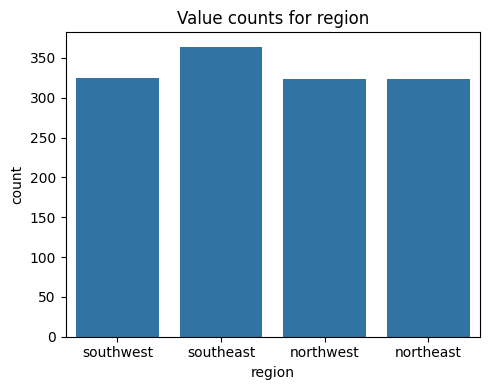

In [136]:
# Write Countplots code for key categorical variables

for c in categorical_features:

    plt.figure(figsize = (5,4))

    # df[c].value_counts().plot(kind = 'bar')

    sns.countplot(data=df, x = df[c])

    plt.title(f"Value counts for {c}")

    plt.ylabel("count")

    plt.xticks(rotation = 0) # [Default - 90]

    plt.tight_layout()

    plt.show()


Target Distribution:
count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: medical_cost, dtype: float64


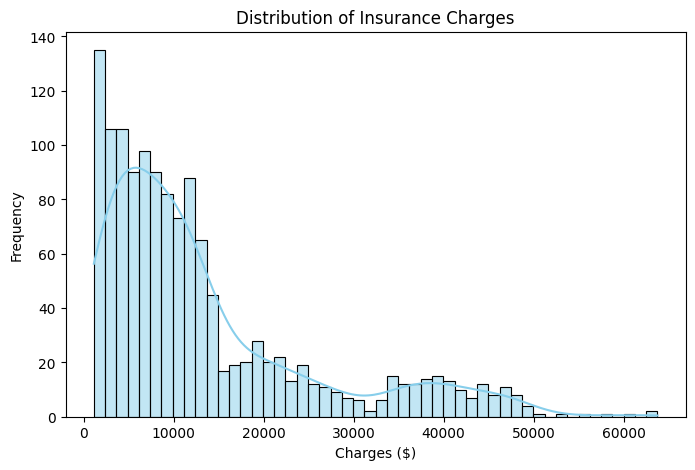

In [137]:
# Counts
print("Target Distribution:")
print(df['medical_cost'].describe())

# plot
plt.figure(figsize=(8,5))
sns.histplot(df['medical_cost'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()

In [138]:
df.head(2)

,person_age,person_gender,person_bmi,num_children,is_smoker,region,medical_cost
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [28]:
# # Bivariate Analysis Numerical columns with Target

# import matplotlib.pyplot as plt
# import seaborn as sns

# numeric_cols = ['person_age', 'person_bmi', 'num_children']
# target_col = 'medical_cost'

# corr_matrix = df[numeric_cols + [target_col]].corr()

# plt.figure(figsize=(8,6))
# sns.heatmap(
#     corr_matrix,
#     annot=True,
#     cmap='coolwarm',
#     fmt='.2f',
#     linewidths=0.5
# )

# plt.title("Correlation Heatmap for Numerical Features and Target")
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()


#### 3.2: Train Test Split

In [139]:
df.shape

(1337, 7)

In [140]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

# this is a Regression problem that way we can't use "stratify"

((1069, 6), (268, 6))

### 4. Create Pipeline For Our model

- 4.1: Pipeline for Numerical Features

- 4.2: Pipeline for Categorical Features

- 4.3: Combine them (numerical and catagorical Features)

- 4.4: Define Model
        - Base learner
        - Fit the base learner with Our model

#### 4.1: Pipeline for Numerical Features
- imputation
- scaler

In [141]:
# Pipeline for numerical features

num_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scalar', StandardScaler())
    ]
)

num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scalar', StandardScaler())])

#### 4.2: Pipeline for Categorical Features
- imputation
- OHE

In [142]:
# Pipeline for Categorical features

cat_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]
)

cat_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

#### 4.3. Combine them (numerical and catagorical Features)

In [143]:
# combine them
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer,numeric_features),

        ('cat', cat_transformer, categorical_features)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scalar', StandardScaler())]),
                                 Index(['person_age', 'person_bmi', 'num_children'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['person_gender', 'is_smoker', 'region'], dtype='object'))])

#### 4. Define Model

- 4.1: We use base learner
    - LinearRegression()
    - SupportVectorRegression()
    - RandomForestRegressor()
    - GradientBoostingRegressor()

- 4.2: Fit the base learner with Our model
    - VotingRegressor()
    - StackingRegressor()

##### 4.1: We use base learner
- LinearRegression()
- SupportVectorRegression()
- RandomForestRegressor()
- GradientBoostingRegressor()

In [144]:
from sklearn.svm import SVR

In [145]:
# Base Learner

reg_lr = LinearRegression()

reg_svr = SVR(kernel = "rbf", C = 300, epsilon = 0.1, gamma = "scale")

reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)

reg_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)



##### 4.2: Fit the base learner with Our model
- VotingRegressor()
- StackingRegressor()

In [146]:
# voting regressor

voting_reg = VotingRegressor(
    estimators=[
        ('lr', reg_lr),
        ('svr',reg_svr),
        ('rf', reg_rf),
        ('gb', reg_gb)
    ]
)
voting_reg

VotingRegressor(estimators=[('lr', LinearRegression()), ('svr', SVR(C=300)),
                            ('rf', RandomForestRegressor(random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42))])

In [147]:
# stacking model

stacking_reg = StackingRegressor(
    estimators=[
        ('svr',reg_svr),
        ('rf', reg_rf),
        ('gb', reg_gb)
    ],
    final_estimator=Ridge() # meta learner
)
stacking_reg

StackingRegressor(estimators=[('svr', SVR(C=300)),
                              ('rf', RandomForestRegressor(random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42))],
                  final_estimator=Ridge())

### 5. Model Training and Evaluation
- Create a dictionary for all models
    - base learner
    - ensemble model
    - Prediction and visualization

In [148]:
# Dictionray of all model

model_to_train = {
    'Linear Regression': reg_lr,
    'Support Vector': reg_svr,
    'Random Forest' : reg_rf,
    'Gradient Boosting': reg_gb,
    'Voting Ensemble' : voting_reg,
    'Stacking Ensemble': stacking_reg
}


In [149]:
# Training and Evaluation

result = []

for name, model in model_to_train.items():
    # Create full pipeline with preprocessor

    pipe = Pipeline(
        [
            ('preprocessor', preprocessor),
            ('model',model)
        ]
    )
    # train or fit the model
    pipe.fit(X_train, y_train)

    # predict
    y_pred = pipe.predict(X_test)

    # Evaluation

    # r2 score
    r2 = r2_score(y_test, y_pred)

    # rmse
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # mean absolute error
    mae = mean_absolute_error(y_test, y_pred)


    # append everything on result list
    result.append({
        "Model":name,
        "R2 Score": r2,
        "RMSE": rmse,
        "MAE": mae
    })


# Result : convert into dataframe

result_df = pd.DataFrame(result).sort_values("R2 Score", ascending= False)


print(result_df)

               Model  R2 Score          RMSE          MAE
3  Gradient Boosting  0.900689   4271.894268  2535.062045
5  Stacking Ensemble  0.897674   4336.238800  2500.243749
2      Random Forest  0.880864   4678.877462  2586.373908
4    Voting Ensemble  0.838371   5449.792661  3241.152470
0  Linear Regression  0.806929   5956.342894  4177.045561
1     Support Vector  0.377436  10695.792622  5180.221495


### 6. Best model

In [150]:
# Best model
best_model_name = result_df.iloc[0]['Model']

best_model_obj = model_to_train[best_model_name]

print("Best Model Name: ", best_model_name)


Best Model Name:  Gradient Boosting


In [151]:
# Best model Evaluation Metrix
best_model_name = result_df.iloc[0]
best_model_name

,3
Model,Gradient Boosting
R2 Score,0.900689
RMSE,4271.894268
MAE,2535.062045


In [152]:
# fit the best model

gb_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', best_model_obj)
])

gb_pipe.fit(X_train, y_train)

gb_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_bmi', 'num_children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['person_gender', 'is_smoker', 'region'], dtype='object'))])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [153]:
# Prediction and visualization

# predict the final model

y_fianl_pred = gb_pipe.predict(X_test)

y_fianl_pred[:2]

array([10571.65062029,  7016.72589715])

In [45]:
df.head(2)

,person_age,person_gender,person_bmi,num_children,is_smoker,region,medical_cost
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


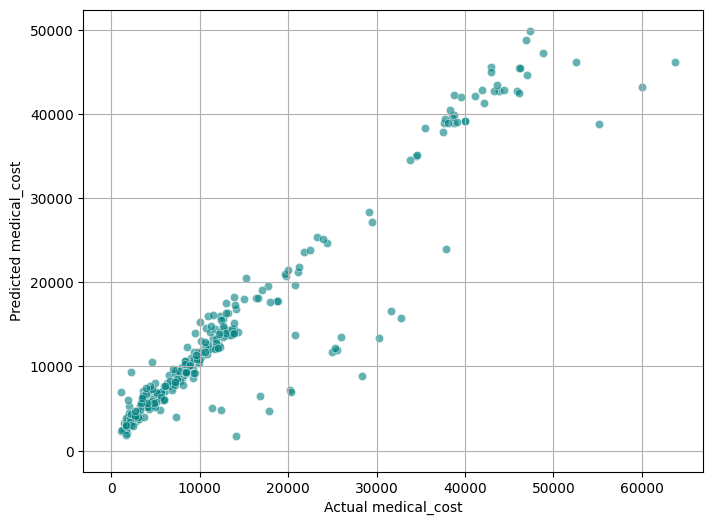

In [154]:
#plot Actual vs predicted

plt.figure( figsize = (8,6) )

sns.scatterplot(x=y_test, y=y_fianl_pred, alpha = 0.6, color='teal' )
plt.plot( [2,5] , [2,5], color = "red", linestyle = '--'  )

plt.xlabel("Actual medical_cost")
plt.ylabel("Predicted medical_cost")

plt.grid(True)
plt.show()

### 7. Cross Validation
- Model : Gradient Boosting

In [155]:
# Cross Validation with 5 fold
cv_scores = cross_val_score(gb_pipe,X_train, y_train, scoring = 'neg_mean_squared_error')

xg_rmse = np.sqrt(-cv_scores)

print("RMSE (GB): \n", xg_rmse)

RMSE (GB): 
 [5411.91100723 4540.96470013 4464.57924225 4685.08542233 4869.76460699]


In [156]:
print(f"RMSE: {xg_rmse.mean():.5f}")

print(f"STD: {xg_rmse.std():.5f}")

RMSE: 4794.46100
STD: 338.21901


### 8. Grid Search CV on Our model
- To Get the best Parameter

In [157]:
#  grid for GradientBoostingRegressor
# (more focused + better results on average)

param_grid = {
    'model__n_estimators':     [100, 150, 200],
    'model__learning_rate':    [0.01, 0.08, 0.1],
    'model__max_depth':        [3, 4, 5],
    'model__min_samples_split': [4, 6, 8],
    'model__subsample':        [0.8,  1.0]
    }

In [52]:
grid_search = GridSearchCV(
    estimator=gb_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs= 1,
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=4, model__n_estimators=100, model__subsample=0.8; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=4, model__n_estimators=100, model__subsample=0.8; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=4, model__n_estimators=100, model__subsample=0.8; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=4, model__n_estimators=100, model__subsample=0.8; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=4, model__n_estimators=100, model__subsample=0.8; total time=   0.2s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__min_samples_split=4, model__n_estimators=100, model__subsample=1.0; total time=   0.2s
[CV] END model__learning_rate=0.01, m

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          StandardScaler())]),
                                                                         Index(['person_age', 'person_bmi', 'num_children'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEn...
                                                                         Index(['person_gender', 'is_smoker', 'region'], dtype='object'))])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=1,
             param_grid={'model__learning_rate': [0.01, 0.08, 0.1],
                         'model__max_depth': [3, 4, 5],
                         'model__min_samples_split': [4, 6, 8],
                         'model__n_estimators': [100, 150, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [158]:
grid_search = GridSearchCV(
    estimator=gb_pipe,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs= -1,
    verbose=2
)

# Fit
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          StandardScaler())]),
                                                                         Index(['person_age', 'person_bmi', 'num_children'], dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEn...
                                                                         Index(['person_gender', 'is_smoker', 'region'], dtype='object'))])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.08, 0.1],
                         'model__max_depth': [3, 4, 5],
                         'model__min_samples_split': [4, 6, 8],
                         'model__n_estimators': [100, 150, 200],
                         'model__subsample': [0.8, 1.0]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [159]:
# predict our model for Grid Search

y_pred_grid = grid_search.predict(X_test)

# r2 score
r2_grid = r2_score(y_test, y_pred_grid)

print("R2 Score (Grid Search): ", r2_grid)

R2 Score (Grid Search):  0.9070139932146066


In [160]:
# The best score
print(f"The Best Score (Grid Search): {- grid_search.best_score_}")

# The best parameter
print(f"\nThe Best Parameters(Grid Search):\n {grid_search.best_params_}")

The Best Score (Grid Search): 4687.555876675125

The Best Parameters(Grid Search):
 {'model__learning_rate': 0.08, 'model__max_depth': 3, 'model__min_samples_split': 8, 'model__n_estimators': 100, 'model__subsample': 0.8}


### 9. Randomized Search CV
    - To Get the best Parameter

In [161]:
# import
from scipy.stats import randint

# define the parameters of randomized cv

param_dist = {
    'model__n_estimators' : randint(100,250) ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : randint(1,10)
}

In [162]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator = gb_pipe,
    param_distributions = param_dist,
    n_iter=1,
    cv = 5 ,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = 1,
    verbose = 2,
    random_state = 42
)

# fit the Random Forest model with random search cv paramaters

random_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END model__max_depth=20, model__min_samples_split=4, model__n_estimators=192; total time=   1.2s
[CV] END model__max_depth=20, model__min_samples_split=4, model__n_estimators=192; total time=   1.5s
[CV] END model__max_depth=20, model__min_samples_split=4, model__n_estimators=192; total time=   1.4s
[CV] END model__max_depth=20, model__min_samples_split=4, model__n_estimators=192; total time=   1.1s
[CV] END model__max_depth=20, model__min_samples_split=4, model__n_estimators=192; total time=   1.1s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scalar',
                                                                                                StandardScaler())]),
                                                                               Index(['person_age', 'person_bmi', 'num_children'], dtype='object')),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                On...
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=1, n_jobs=1,
                   param_distributions={'model__max_depth': [None, 10, 20],
                                        'model__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78447b8ab440>,
                                        'model__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78447b953aa0>},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [163]:
# predict our model for Random Search

y_pred_random = random_search.predict(X_test)

# r2 score
r2_random = r2_score(y_test, y_pred_random)

print("R2 Score (Random Search): ", r2_random)

R2 Score (Random Search):  0.8226408830393308


In [164]:
# The best score
print(f"The Best Score (Random Search): {- random_search.best_score_}")

# The best parameter
print(f"\nThe Best Parameters(Random Search):\n {random_search.best_params_}")

The Best Score (Random Search): 5954.356700369516

The Best Parameters(Random Search):
 {'model__max_depth': 20, 'model__min_samples_split': 4, 'model__n_estimators': 192}


### 10. Comapre Which Parameters is Best for Our model.

- 10.1: Prediction and Evaluation for Grid search:

    - The Best Parameters(Grid Search):
        - 'model__learning_rate': 0.08,
        - 'model__max_depth': 3,
        - 'model__min_samples_split': 8,
        - 'model__n_estimators': 100,
        - 'model__subsample': 0.8

    - R2 Score (Grid Search):  0.9070139932146066
    - The Best Score (Grid Search): 4687.555876675125
    

- 10.2: Prediction and Evaluation for Random Search cv:

    - The Best Parameters(Random Search):
        - 'model__max_depth': 20,
        - 'model__min_samples_split': 4,
        - 'model__n_estimators': 192

    - R2 Score (Random Search):  0.8226408830393308
    - The Best Score (Random Search): 5954.356700369516


- So, the Final Parameters(Grid Serarch cv=5):
    - 'model__learning_rate': 0.08,
    - 'model__max_depth': 3,
    - 'model__min_samples_split': 8,
    - 'model__n_estimators': 100,
    - 'model__subsample': 0.8


### 11. Save Model with Best Parameters

In [165]:
# Save the Final MOdel
import pickle
filename = "gb_pipe.pkl"

with open( filename, "wb" ) as file:
  pickle.dump( gb_pipe, file )

In [166]:
# load the final model

with open("gb_pipe.pkl" , "rb") as file:
    model_final_gb = pickle.load(file)

model_final_gb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  Index(['person_age', 'person_bmi', 'num_children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['person_gender', 'is_smoker', 'region'], dtype='object'))])),
                ('model', GradientBoostingRegressor(random_state=42))])

### 12. MLFlow Introduce
- 12.1: Discover MLFlow

- 12.2: Mlflow with RandomForest model

- 12.3: Mlflow with our best model

#### 12.1: Discover MLFlow

In [167]:
import mlflow


# Tracking folder
mlflow.set_tracking_uri("mlruns_Charges")

# experiment name
mlflow.set_experiment("Medical Insurance Charges")

<Experiment: artifact_location='/content/mlruns_Charges/104505630877866357', creation_time=1768811219562, experiment_id='104505630877866357', last_update_time=1768811219562, lifecycle_stage='active', name='Medical Insurance Charges', tags={}>

#### 12.2: Mlflow with RandomForest model

- The Final Parameters(Grid Serarch cv=5):
    - 'model__learning_rate': 0.08,
    - 'model__max_depth': 3,
    - 'model__min_samples_split': 8,
    - 'model__n_estimators': 100,
    - 'model__subsample': 0.8


In [168]:
# the best parameter of Random Forest
best_params = {
    'n_estimators': 100,
    'learning_rate': 0.08,
    'max_depth': 3,
    'min_samples_split': 8,
    'subsample': 0.8,
    'random_state': 42
}

#### 12.3: Mlflow with our best model
- Save The Best model and Best Parameters

In [169]:
# Start Ml flow
import mlflow.sklearn

with mlflow.start_run(run_name= "model_final_gb"):
    ### === log parameters === ###
    mlflow.log_params(best_params)

    ### === log Model name === ###
    mlflow.log_param("model_type", "GradientBoostingRegressor")

    ### === Train the model  === ###
    model_final_gb.fit(X_train,y_train)


    # Train predict (To check overfit or not)
    y_train_pred = model_final_gb.predict(X_train)

    # Train Evaluation
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

    train_r2 = r2_score(y_train, y_train_pred)

    ### === log train details === ###
    mlflow.log_metric("Final model train rmse", train_rmse)
    mlflow.log_metric("Final model train r2", train_r2)



    ### === Test Predict === ###
    # predict
    y_test_pred = model_final_gb.predict(X_test)

    # Evaluation

    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    test_r2 = r2_score(y_test, y_test_pred)

    ### === Log the test detatis === ###
    mlflow.log_metric("Final Model Test rmse", test_rmse)
    mlflow.log_metric("Final Model Test r2", test_r2)


In [170]:
print("Train R2 socre: ", train_r2)
print("Train RMSE socre: ", train_rmse)


print("\nTest R2 socre: ", test_r2)
print("Test RMSE socre: ", test_rmse)


print("\nBest Parameters: ")
best_params

Train R2 socre:  0.8932251074377553
Train RMSE socre:  3823.4865230896967

Test R2 socre:  0.9006885528992274
Test RMSE socre:  4271.894267589475

Best Parameters: 


{'n_estimators': 100,
 'learning_rate': 0.08,
 'max_depth': 3,
 'min_samples_split': 8,
 'subsample': 0.8,
 'random_state': 42}